<a href="https://colab.research.google.com/github/mikelmiras/mdd/blob/main/Copia_de_MdD_K_NN_version_Alumno_(version_24_12).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors

Si bien existen muchos modelos de clasificación supervisada, uno de los más conocidos (e intuitivos) es el **K-Nearest Neighbors**, también conocido como **K-NN**. Este modelo de clasificación se basa en las distancias entre individuos del conjunto de datos. Dada cualquier muestra a clasificar $x$, el funcionamiento del **K-NN** es el siguiente:

**1.** Se calcula la distancia entre la muestra $x$ y todas las muestras del conjunto de entrenamiento. La métrica de distancia utilizada dependerá de la elección del usuario.

**2.** Entre todas las muestras del conjunto de entrenamiento, se eligen las $K$ más cercanas a $x$ en base a la métrica de distancia utilizada.

**3.** Se predice la clase de $x$ en base a la clase de los $K$ vecinos más cercanos. La técnica utilizada dependerá de la elección del usuario.

![](https://drive.google.com/uc?id=1R7JjvI2eY8cv6_aqR5WteXwzuY0lT0nA)

En la imagen anterior se puede observar un ejemplo de un 3-NN (es decir, un K-NN que solo se fija en los 3 vecinos más cercanos) para un conjunto de datos con solo 2 variables numéricas. En este caso, podemos considerar cada muestra como un punto en un plano de dos dimensiones, y por lo tanto, podemos utilizar la **distancia euclídea** como métrica de distancia. Si nos fijamos en las 3 muestras más cercanas a la muestra a clasificar, podemos observar que encontramos una muestra de la clase *A* y dos muestras de la clase *B*. Por lo tanto, utilizando la técnica del **voto mayoritario**, clasificaremos la nueva muestra como perteneciente a la clase más común entre sus vecinos más cercanos, en este caso, la clase *B*.

Teniendo todo esto en cuenta, en este *notebook* trataremos de programar desde cero un **K-NN** básico, y lo modificaremos iterativamente para mejorar su rendimiento. Finalmente, crearemos un pequeño esquema de **parameter tuning** para seleccionar la mejor configuración de hiper-parámetros para el modelo.

# Preparación del entorno

Lo primero que vamos a hacer será importar los paquetes que necesitaremos para la implementación del *K-NN* (*numpy*, *sklearn*). Además, también importaremos varios paquetes de visualización de datos para poder visualizar mejor los resultados que obtengamos a lo largo de este *notebook* (*seaborn*, *matplotlib*).

In [1]:
import numpy as np
from sklearn import datasets, model_selection
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

Una vez importados todos los paquetes, el siguiente paso es cargar y preparar la base de datos sobre la que trabajaremos. En concreto, en este *notebook* consideraremos el **Olivetti Faces data-set** disponible en la libreria *sklearn*. Esta base de datos consta de 400 imagenes de caras en blanco y negro distribuidas en 40 clases distintas (numeradas del 0 al 39). Cada imagen tiene un tamaño de de 64x64 pixeles, donde el color de cada pixel se representa con un número real entre el 0 (*negro*) y el 1 (*blanco*). Cada una de las clases se asocia con la cara de una persona concreta.

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


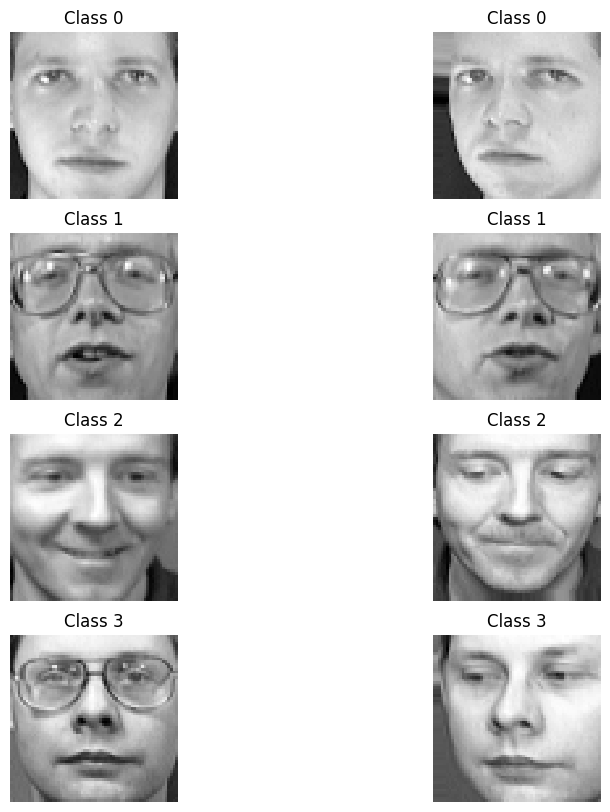

In [2]:
X, y = datasets.fetch_olivetti_faces(return_X_y=True)

fig = plt.figure(figsize=(10, 10))
for i in range(8):
  fig.add_subplot(4, 2, i+1)
  plt.imshow(X[5*i].reshape(64, 64), cmap = mpl.cm.gray, interpolation="nearest")
  plt.title("Class "+str(y[5*i]))
  plt.axis("off")

A continuación dividiremos el conjunto de datos en un conjunto de entrenamiento (80%) y un conjunto de test (20%). Para ello utilizaremos la función **train_test_split** del paquete *sklearn*. Configuraremos la función para que nos devuelva dos conjuntos con una proporción de clases similar (ver parámetro *stratify*).

In [4]:
#DIVIDE LA BASE DE DATOS EN CONJUNTO DE ENTRENAMIENTO Y TEST
#LA PROPORCIÓN DE CLASES SERÁ SIMILAR EN AMBOS CONJUNTOS

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, test_size=.8, random_state=8)

n_classes = 40

print ("Cantidad de muestras de train:", len(X_train))
print ("Cantidad de muestras de cada clase en train:", np.unique(y_train,return_counts=True)[1])
print ()
print ("Cantidad de muestras de test:", len(X_test))
print ("Cantidad de muestras de cada clase en test:", np.unique(y_test,return_counts=True)[1])

Cantidad de muestras de train: 80
Cantidad de muestras de cada clase en train: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2]

Cantidad de muestras de test: 320
Cantidad de muestras de cada clase en test: [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8]


# 1. K-NN básico

Como hemos mencionado anteriormente, los píxeles de cada imagen en nuestra base de datos se representan con números reales entre el 0 y el 1. Por lo tanto, nos encontramos ante una base de datos numérica. En estos casos, una elección natural para nuestro **K-NN** es utilizar la conocida **distancia euclídea**. Dadas dos muestras de $n$ variables numéricas $x=\big\{x(1),x(2),...,x(n)\big\}$ y $z=\big\{z(1),z(2),...,z(n)\big\}$, la distancia euclídea entre ellas se calcula como:

\begin{align}
d_e(x,z)=\sqrt{\sum\limits_{i=1}^n\big(x(i)-z(i)\big)^2}
\end{align}

Dicho esto, la primera tarea a realizar será crear un primer **K-NN básico** que utilice la distancia euclídea y el voto mayoritario para clasificar las instancias del conjunto de test.


In [7]:
###CALCULA LA DISTANCIA EUCLIDEA ENTRE LOS VECTORES NUMÉRICOS A Y B
def euclidean(A,B,*args):

  ########AÑADE AQUÍ TU CÓDIGO########

  #...
  dist = np.sqrt(np.sum((np.array(A) - np.array(B))**2))

  return dist

#CALCULA LA CLASE EN FUNCIÓN DE LOS VECINOS (VOTO MAYORITARIO)
def majority(neighbors_classes,*args):

  ########AÑADE AQUÍ TU CÓDIGO########

  #PISTA: Cuenta la cantidad de veces que aparece cada clase en los vecinos
  #más cercanos, y quédate con aquella que sea más frecuente.
  #...
  from collections import Counter
  class_counts = Counter(neighbors_classes)

    # Obtiene la clase más frecuente (voto mayoritario)
  selected_class = max(class_counts, key=class_counts.get)

  return selected_class

###DEVUELVE LA CLASE DE LOS K VECINOS MÁS CERCANOS (DISTANCIA EUCLIDEA)
def get_neighbors(test_row, X_train, y_train, k):
    # Calcula las distancias euclidianas entre la muestra de prueba y todas las muestras de entrenamiento
  dists = np.array([euclidean(test_row, train_row) for train_row in X_train])

    # Obtiene los índices de las distancias ordenadas de menor a mayor
  sorted_indices = np.argsort(dists)

    # Selecciona los índices de los k vecinos más cercanos
  k_nearest_indices = sorted_indices[:k]

    # Obtiene las clases correspondientes a los k vecinos más cercanos
  neighbors_classes = [y_train[i] for i in k_nearest_indices]

  return neighbors_classes

###CLASIFICADOR K-NN
def k_nearest_neighbors(X_train,X_test,y_train,k):
  predictions = np.empty(len(X_test),dtype=y_train.dtype)
  for test_ind in range(len(X_test)):
    ###ENCUENTRA LOS K VECINOS MÁS CERCANOS (DISTANCIA EUCLIDEA)
    test_row = X_test[test_ind]
    neighbors_classes = get_neighbors(test_row,X_train,y_train,k)
    ###CALCULA LA CLASE SEGÚN LOS K VECINOS MÁS CERCANOS (VOTO MAYORITARIO)
    predictions[test_ind] = majority(neighbors_classes)
  return predictions

Ahora que hemos implementado una primera versión de nuestro **K-NN**, vamos comprobar cómo funciona a la hora de predecir la identidad de las imágenes de test. Para ello, implementaremos dos funciones adicionales:

- Una función simple que nos calcule el **accuracy** del modelo en base a las clases predichas y reales.

- Una función que nos visualice en forma de mapa de calor la **matriz de confusión** de las predicciones realizadas. Para ello, utilizaremos la función *heatmap* del paquete *seaborn*.

Utilizaremos las funciones implementadas para comprobar el rendimiento del modelo con $K=5$.

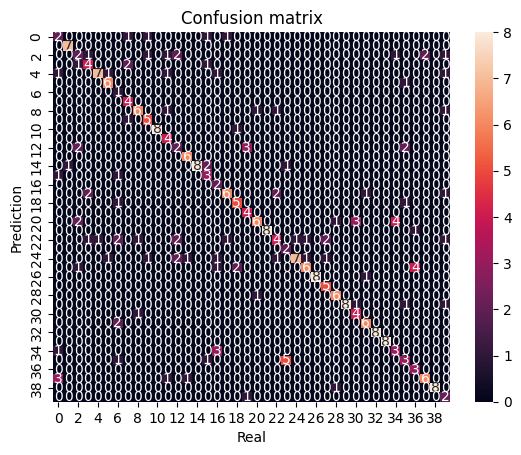

Test accuracy: 0.634375


In [12]:
#DEVUELVE EL ACCURACY EN BASE A LAS PREDICCIONES Y LAS CLASES REALES
def accuracy(pred,real):

  ########AÑADE AQUÍ TU CÓDIGO########

  #...
  correct_predictions = np.sum(pred == real)
  total_samples = len(real)
  accuracy = correct_predictions / total_samples
  return accuracy

#MUESTRA LA MATRIZ DE CONFUSIÓN EN FORMA DE HEATMAP
def confusion_matrix(pred,real,n_classes):
  conf_mat = np.zeros((n_classes,n_classes))
  #CONSTRUYE LA MATRIZ DE CONFUSIÓN

  ########AÑADE AQUÍ TU CÓDIGO########

  #PISTA: La posición (i,j) de la matriz de confusión deberá contener la
  #cantidad de veces que una muestra con clase real j ha sido clasificada
  #como clase i.
  #...

  conf_mat = np.zeros((n_classes, n_classes))

  for i in range(n_classes):
    for j in range(n_classes):
      conf_mat[i, j] = np.sum((pred == i) & (real == j))
  #CREA Y MUESTRA EL HEATMAP BASADO EN LA MATRIZ DE CONFUSIÓN
  sns.heatmap(conf_mat,annot=True,fmt="g")
  plt.title("Confusion matrix")
  plt.ylabel("Prediction")
  plt.xlabel("Real")
  plt.show()

pred = k_nearest_neighbors(X_train,X_test,y_train,k=5)

confusion_matrix(pred,y_test,n_classes)
print("Test accuracy:",str(accuracy(pred,y_test)))

Como se puede observar, los resultados obtenidos son bastante buenos para un modelo tan simple. Realizando todo de forma correcta, se debería obtener un accuracy cercano al 0.86. Sin embargo, como veremos a continuación, aún hay espacio para la mejora.

# 2. K-NN ponderado según distancia

![](https://drive.google.com/uc?id=1Dj9JXP7mUSymBPsAWZyK8USYNpmDFRzi)

En la imagen previa se puede observar una situación en la que se utiliza un 5-NN para predecir la clase de una muestra dada. En este ejemplo, solo dos de los cinco vecinos más cercanos pertenecen a la clase *B*, mientras que los otros tres pertenecen a la clase *A*. Siguiendo la estrategia del **voto mayoritario**, el modelo predeciría la clase *A* para la nueva muestra, ya que es la clase más común entre sus vecinos.

Sin embargo, en la imagen se observa que los dos vecinos más cercanos son aquellos que pertenecen a la clase *B*. En este caso, ¿No deberíamos dar más importancia a aquellas muestras que estén más cerca? ¿Es justo darles la misma importancia a los $K$ vecinos más próximos, sin considerar la distancia a la que se encuentran?

Si bien no hay una respuesta universal para estas preguntas, considerar la distancia a los vecinos más cercanos a la hora de hacer la predicción puede ser una buena opción en muchas situaciones, sobre todo cuando las muestras se encuentran cerca de la frontera de decisión entre clases. Una forma de hacer esto es utilizar un **voto mayoritario ponderado** a la hora de seleccionar la clase a predecir. En esta estrategia, la importancia de los vecinos va decreciendo según aumenta la distancia con respecto a la muestra a clasificar. Es decir, dada un muestra $x$, un conjunto de vecinos más cercanos $\big\{z_1,z_2,...,z_K\big\}$ y sus respectivas clases $\big\{y_1,y_2,...,y_K\big\}$, la clase de $x$ se predice como:

\begin{align}
y'=\underset{c_i\in C}{argmax}\sum\limits_{j=1}^K\Big(\frac{\delta_{c_iy_j}}{d(x,z_j)}\Big)
\end{align}

donde $\big\{c_1,c_2,...,c_m\big\}$ es el conjunto de todas las posibles clases y $d(x,z)$ es la distancia entre las muestras $x$ y $z$. La expresión $\delta_{cy}$ es 1 si la condición $c=y$ es cierta, mientras que es 0 en caso contrario.

Si nos fijamos en la anterior ecuación, observaremos que la contribución de cada vecino a la votación es inversamente proporcional a su distancia con respecto a la muestra a clasificar. Por lo tanto, en este tipo de **K-NN ponderado** no todos los vecinos tienen la misma relevancia.

Teniendo esto en cuenta, vamos a implementar un **K-NN** que acepte distintos tipos de estrategias de selección de clase en base a los vecinos más cercanos. Para ello, deberemos modificar el **K-NN** del ejercicio anterior de la siguiente forma:

- Modificar la función *get_neighbors* de forma que nos devuelva no solo los vecinos más cercanos, sino la distancia a la que se encuentran.

- Modificar la función *k_nearest_neighbors* de forma que acepte un parámetro extra llamado *selection*, el cuál nos indicará qué estrategia utilizar para elegir la clase en base a los vecinos más cercanos.

- Añadir una función *weighted_majority* que implemente el voto mayoritario ponderado.

In [15]:
#CALCULA LA CLASE EN FUNCIÓN DE LOS VECINOS (VOTO MAYORITARIO PONDERADO)
def weighted_majority(neighbors_classes,neighbors_dists):

  ########AÑADE AQUÍ TU CÓDIGO########

  #PISTA: Fíjate en la clase de cada uno de los vecinos más cercanos,
  #y pondera cada caso según la distancia a la muestra a clasificar.
  #...
  weights = 1 / (neighbors_dists + 1e-10)  # Añade un pequeño epsilon para evitar divisiones por cero
  weighted_votes = np.zeros(np.max(neighbors_classes) + 1)

  for i, neighbor_class in enumerate(neighbors_classes):
    weighted_votes[neighbor_class] += weights[i]

    # Selecciona la clase con el voto ponderado mayor
  selected_class = np.argmax(weighted_votes)
  return selected_class

###DEVUELVE LA CLASE Y DISTANCIA DE LOS K VECINOS MÁS CERCANOS (DISTANCIA EUCLIDEA)
def get_neighbors(test_row, X_train, y_train, k):
    """
    Devuelve la clase y distancia de los k vecinos más cercanos (distancia euclidiana).

    Parameters:
    test_row (array-like): Fila de la muestra a clasificar.
    X_train (array-like): Conjunto de entrenamiento.
    y_train (array-like): Etiquetas del conjunto de entrenamiento.
    k (int): Número de vecinos a considerar.

    Returns:
    neighbors_classes: Lista de clases de los vecinos más cercanos.
    neighbors_dists: Lista de distancias a los vecinos más cercanos.
    """
    # Calcula las distancias euclidianas
    distances = np.linalg.norm(X_train - test_row, axis=1)

    # Encuentra los índices de los k vecinos más cercanos
    indices = np.argsort(distances)[:k]

    # Obtiene las clases y distancias de los k vecinos más cercanos
    neighbors_classes = y_train[indices]
    neighbors_dists = distances[indices]

    return neighbors_classes, neighbors_dists

###CLASIFICADOR K-NN
def k_nearest_neighbors(X_train,X_test,y_train,k,selection):
  predictions = np.empty(len(X_test),dtype=y_train.dtype)
  for test_ind in range(len(X_test)):
    ###ENCUENTRA LOS K VECINOS MÁS CERCANOS (DISTANCIA EUCLIDEA)
    test_row = X_test[test_ind]
    neighbors_classes, neighbors_dists = get_neighbors(test_row,X_train,y_train,k)
    ###CALCULA LA CLASE SEGÚN LOS K VECINOS MÁS CERCANOS
    predictions[test_ind] = selection(neighbors_classes,neighbors_dists)
  return predictions

A continuación, comprobemos los resultados que se obtienen en el conjunto de test si utilizamos la estrategia del voto mayoritario ponderado. Al igual que en el anterior ejercicio, nos fijaremos solo en los 5 vecinos más próximos.

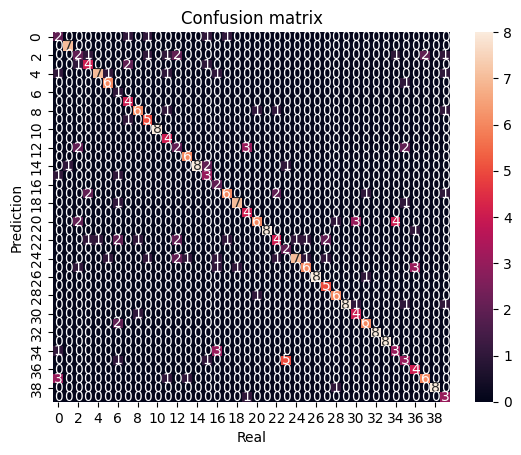

Test accuracy: 0.646875


In [19]:
#INDICA QUE LA SELECCIÓN DE CLASE EN BASE A LOS VECINOS MÁS CERCANOS SE REALIZARÁ
#A TRAVÉS DE UN VOTO MAYORITARIO PONDERADO

#PISTA: En Python, se pueden pasar funciones como argumentos de otra función.

pred = k_nearest_neighbors(X_train,X_test,y_train,k=5,selection=weighted_majority)

confusion_matrix(pred,y_test,n_classes)
print("Test accuracy:",str(accuracy(pred,y_test)))

Como se puede observar, los resultados obtenidos son algo mejores que en el caso del voto mayoritario. En concreto, se obtienen valores de accuracy de alrededor de 0.87, lo que implica una subida de 0.01 con respecto al anterior ejercicio.

# 3. Distancias alternativas

Hasta ahora, los **K-NN** que hemos implementado para nuestra base de datos se han basado siempre en la **distancia euclídea**. Sin embargo, esta no es la única opción. Por ejemplo, si los datos fueran categóricos en lugar de numéricos, nos veríamos obligados a utilizar otras métricas de distancia, tales como la distancia de Jaccard o la distancia de Hamming.

Incluso con datos numéricos, existen multitud de alternativas a la distancia euclídea. De hecho, existen otras métricas que pueden ser incluso más adecuadas cuando la dimensionalidad del problema es alta (como en nuestro caso). Una de las más conocidas y utilizadas es la **distancia de Manhattan**. Dadas dos muestras de $n$ variables numéricas $x=\big\{x(1),x(2),...,x(n)\big\}$ y $z=\big\{z(1),z(2),...,z(n)\big\}$, la distancia de Manhattan entre ellas se calcula como:

\begin{align}
d_m(x,z)=\sum\limits_{i=1}^n|x(i)-z(i)|
\end{align}

![](https://drive.google.com/uc?id=1lTl6VfbS9gQUEpUb6xrY2dIMbL8989KN)

La imagen anterior muestra visualmente la diferencia entre la distancia euclídea (*verde*) y la de Manhattan (*azul*) para dos puntos en un plano de dos dimensiones (en este ejemplo, un mapa). La distancia euclídea calcula la distancia más corta entre ambos puntos, mientras que la distancia de Manhattan calcula la suma de las diferencias en todas las dimensiones (o variables).

En este ejercicio, vamos a mejorar nuestro **K-NN** para que acepte distintas métricas de distancia. Para ello, haremos lo siguiente:

- Modificar las funciones *get_neighbors* y *k_nearest_neighbors* para que acepten un nuevo argumento *distance* que nos indicará la métrica de distancia a utilizar.

- Añadir una nueva función *manhattan* que implemente la distancia de Manhattan. Recordemos que la distancia euclídea ya la implementamos en el primer ejercicio (función *euclidean*).

In [22]:
#CALCULA LA DISTANCIA DE MANHATTAN ENTRE LOS VECTORES NUMÉRICOS A Y B
def manhattan(A,B,*args):

  ########AÑADE AQUÍ TU CÓDIGO########

  #...
  dist = np.sum(np.abs(A - B))
  return dist

###DEVUELVE LA CLASE Y DISTANCIA DE LOS K VECINOS MÁS CERCANOS
def get_neighbors(test_row, X_train, y_train, k, distance):
    """
    Devuelve la clase y distancia de los k vecinos más cercanos.

    Parameters:
    test_row (array-like): Fila de la muestra a clasificar.
    X_train (array-like): Conjunto de entrenamiento.
    y_train (array-like): Etiquetas del conjunto de entrenamiento.
    k (int): Número de vecinos a considerar.
    distance (function): Función de distancia.

    Returns:
    neighbors_classes: Lista de clases de los vecinos más cercanos.
    neighbors_dists: Lista de distancias a los vecinos más cercanos.
    """
    # Calcula las distancias usando la función de distancia proporcionada
    distances = np.array([distance(test_row, x) for x in X_train])

    # Encuentra los índices de los k vecinos más cercanos
    indices = np.argsort(distances)[:k]

    # Obtiene las clases y distancias de los k vecinos más cercanos
    neighbors_classes = y_train[indices]
    neighbors_dists = distances[indices]

    return neighbors_classes, neighbors_dists

###CLASIFICADOR K-NN
def k_nearest_neighbors(X_train,X_test,y_train,k,selection,distance):
  predictions = np.empty(len(X_test),dtype=y_train.dtype)
  for test_ind in range(len(X_test)):
    ###ENCUENTRA LOS K VECINOS MÁS CERCANOS
    test_row = X_test[test_ind]
    neighbors_classes, neighbors_dists = get_neighbors(test_row,X_train,y_train,k,distance)
    ###CALCULA LA CLASE SEGÚN LOS K VECINOS MÁS CERCANOS
    predictions[test_ind] = selection(neighbors_classes,neighbors_dists)
  return predictions

Finalmente, probemos cómo funciona nuestro **K-NN** con la distancia de Manhattan y el voto mayoritario ponderado implementado en el ejercicio anterior. Como hasta ahora, consideraremos $K=5$.

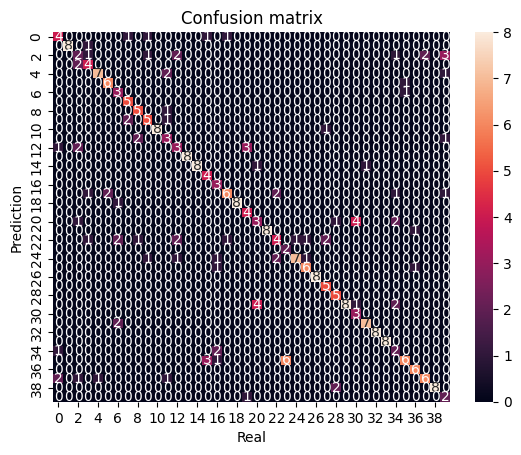

Test accuracy: 0.675


In [23]:
pred = k_nearest_neighbors(X_train,X_test,y_train,k=5,selection=weighted_majority,distance=manhattan)

confusion_matrix(pred,y_test,n_classes)
print("Test accuracy:",str(accuracy(pred,y_test)))

Con solo cambiar la métrica de distancia, hemos conseguido aumentar el accuracy del modelo hasta alrededor de 0.91. Por lo tanto, elegir la distancia correcta para cada problema es crucial a la hora de crear un buen modelo **K-NN**.

# 4. Parameter tuning

Como hemos visto hasta el momento, parece que elegir una buena configuración de hiper-parámetros (distancia, método de selección de clase...) resulta vital para obtener un modelo con un buen rendimiento. Esto no ocurre solo en el **K-NN**, sino que cualquier modelo de clasificación con hiper-parámetros necesita ser ajustado de antemano. Este proceso de elegir la mejor configuración posible para un modelo es lo que se conoce como **parameter tuning**.

Si bien hasta ahora hemos estado probando las distintas versiones del **K-NN** sobre el conjunto de test, esto no debe hacerse a la hora de realizar el parameter tuning. El conjunto de test solo debe de utilizarse para comprobar el rendimiento del modelo final, lo que nos dará una idea de cómo *generaliza* nuestro clasificador al presentarle datos nunca antes vistos. Si utilizásemos el conjunto de test para hacer el parameter tuning, los resultados que obtendríamos sobre dicho conjunto estarían sesgados debido a nuestras decisiones, por lo que las métricas de generalización no serían fiables. Este fenómeno es lo que se conoce como *data leaking*. Por lo tanto, la elección de los hiper-parámetros debe de ser realizada tomando en cuenta solo el conjunto de entrenamiento.

Para ello, en este ejercicio dividiremos el conjunto de entrenamiento en dos porciones diferenciadas, y utilizaremos una de ellas como **conjunto de validación**. Es decir, crearemos los modelos considerando solo una porción de las muestras de entrenamiento, y utilizaremos el resto para probar el rendimiento de las distintas configuraciones de hiper-parámetros. Por lo tanto, nuestra base de datos quedará particionada de la siguiente forma.

![](https://drive.google.com/uc?id=1wWKpTcJTssf2r7heqfd_9EBly-hyDHFh)

El parameter tuning que implementaremos se centrará en optimizar la cantidad de vecinos a considerar ($K$), y supondremos que tanto la distancia como el método de selección de clase ya han sido definidos de antemano por un experto. En concreto, utilizaremos la **distancia de Manhattan** y el **voto mayoritario ponderado** implementados en ejercicios anteriores.

El parámetro $K$ será elegido mediante una estrategia **grid search**. Este método se basa en definir un conjunto de configuraciones de hiper-parámetros que se evalúan una por una sobre el conjunto de validación. Después, se comparan los resultados obtenidos por cada configuración, y se seleccionan aquellos hiper-parámetros que obtengan los mejores resultados. Es importante destacar que esta estrategia no prueba todas las posibles combinaciones de los hiper-parámetros, sino que tendremos que decidir de antemano qué valores queremos probar.

Teniendo todo esto en cuenta, vamos a implementar un parameter tuning basado en grid search para optimizar el parámetro $K$ de nuestro **K-NN**. También incluiremos una visualización de los valores de accuracy obtenidos en el conjunto de validación por las distintas configuraciones del hiper-parámetro $K$ (función *plot* del paquete *matplotlib*).


In [33]:
#CREA Y MUESTRA LA GRÁFICA QUE REPRESENTA EL ACCURACY EN VALIDACIÓN OBTENIDO POR LOS DISTINTOS VALORES DE K
def plot_tuning(k_values,k_acc):
  plt.plot(k_values,k_acc,"o-")
  plt.ylabel("Validation Accuracy")
  plt.xlabel("k")
  plt.xticks(k_values)
  plt.show()

#REALIZA EL PARAMETER TUNING DEL PARÁMETRO K DEL K-NN
def parameter_tuning(X_train, y_train, validation_split, k_values):
    # Divide el conjunto de entrenamiento para obtener el conjunto de validación
    X_train_split, X_validation, y_train_split, y_validation = model_selection.train_test_split(
        X_train, y_train, stratify=y_train, test_size=validation_split, random_state=8
    )

    # Evalúa los distintos modelos en el conjunto de validación
    k_acc = np.zeros(len(k_values))

    for i, k in enumerate(k_values):
        # Utiliza k-NN con la distancia de Manhattan y el voto mayoritario ponderado
        pred = k_nearest_neighbors(
            X_train_split, X_validation, y_train_split, k, selection=weighted_majority, distance=manhattan
        )

        # Calcula y almacena el accuracy en el conjunto de validación
        k_acc[i] = accuracy(pred, y_validation)

    # Muestra la gráfica de tuning
    plot_tuning(k_values, k_acc)

    # Encuentra el mejor valor de k
    best_k_index = np.argmax(k_acc)
    best_k = k_values[best_k_index]
    max_acc = k_acc[best_k_index]

    return max_acc, best_k

A continuación, probemos nuestro parameter tuning. Para ello, utilizaremos un conjunto de validación compuesto por el 30% de las muestras de entrenamiento. En cuanto a los valores de $K$ a considerar, probaremos con: $[1,3,5,7,9,11,13,15,17,19]$.

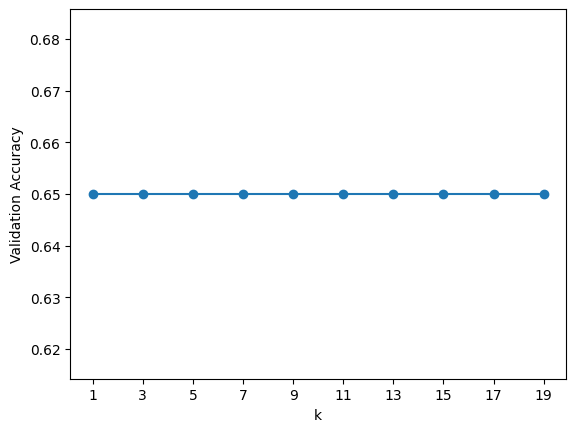

Best validation accuracy: 0.65 , Best k: 1


In [39]:
k_values = np.array([1,3,5,7,9,11,13,15,17,19])
max_acc, best_k = parameter_tuning(X_train,y_train,.5,k_values)
print("Best validation accuracy:",max_acc,", Best k:",best_k)

Al parecer, el modelo obtiene los mejores resultados con $K=1$. De hecho, la gráfica debería mostrar que el accuracy en el conjunto de validación decrece según aumenta el valor de $K$. Esto tiene sentido ya que la cantidad de muestras por cada clase en nuestra base de datos es muy pequeña, por lo que considerar muchos vecinos podría llevar a error.

Ahora sí, una vez que hemos decidido la configuración de los hiper-parámetros para el modelo, podemos comprobar su rendimiento sobre el conjunto de test. En este punto consideraremos el conjunto de entrenamiento entero para construir el modelo, incluyendo las instancias que utilizamos para la validación durante el parameter tuning.

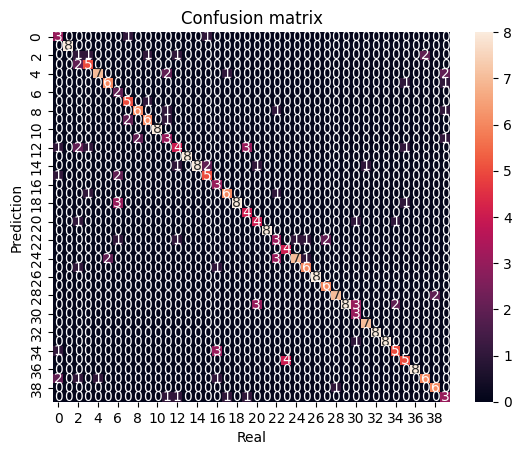

Test accuracy: 0.70625


In [40]:
pred = k_nearest_neighbors(X_train,X_test,y_train,k=best_k,selection=weighted_majority,distance=manhattan)

confusion_matrix(pred,y_test,n_classes)
print("Test accuracy:",str(accuracy(pred,y_test)))

Con el parámetro $K$ optimizado el accuracy en el conjunto de test aumenta hasta alrededor de 0.94. Este accuracy resulta muy similar al obtenido durante la validación, lo que demuestra que nuestro **K-NN** es capaz de generalizar de forma correcta a muestras nunca antes vistas.

# 5. K-NN con funciones de librería

A lo largo de este *notebook* hemos implementado un **K-NN** que hemos mejorado iterativamente, añadiendo distintas métricas de distancia, métodos de selección de clase, e incluso un parameter tuning para decidir el valor de $K$. Todo esto ha sido hecho a mano, utilizando solo funciones de librería básicas como apoyo. Sin embargo, a la hora de trabajar con este tipo de modelos en el mundo real no hace falta que implementemos todo desde cero. Existen decenas de paquetes que incluyen métodos de clasificación como el **K-NN**, siendo un ejemplo claro el conocido *sklearn*.

Este ejercicio consiste en ejecutar un **K-NN** con las mismas características que el modelo final del anterior apartado utilizando solo funciones del paquete *sklearn*. Para ello, será necesario investigar la documentación de dicho paquete para entender las distintas funciones y sus argumentos. Si todo se realiza correctamente, los resultados en el conjunto de test deberían ser idénticos a los obtenidos por nuestro modelo.

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#DEFINE, CREA Y EVALUA EL MODELO
neigh = KNeighborsClassifier(n_neighbors="""AÑADIR PARÁMETRO""",weights="""AÑADIR PARÁMETRO""",metric="""AÑADIR PARÁMETRO""",algorithm="brute")

########AÑADE AQUÍ TU CÓDIGO########

#PISTA: Crea el modelo utilizando las muestras de train y evalúalo sobre el conjunto
#de test. Utiliza solo funciones de la librería sklearn.
#...
n_neighbors = 5  # Número de vecinos
weights = 'distance'  # Tipo de ponderación ('uniform' o 'distance')
metric = 'manhattan'  # Métrica de distancia (puedes elegir entre 'euclidean', 'manhattan', 'minkowski', entre otras)

# Crea el modelo k-NN
neigh = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric, algorithm='brute')

# Entrena el modelo con el conjunto de entrenamiento
neigh.fit(X_train, y_train)

# Realiza predicciones en el conjunto de test
pred = neigh.predict(X_test)

# Evalúa el modelo en el conjunto de test
test_accuracy = accuracy_score(pred, y_test)

print("Test accuracy:",str(accuracy_score(pred,y_test)))

Test accuracy: 0.675


# EXTRA-1. Variables categóricas

Si bien hasta el momento hemos considerado una base de datos con variables numéricas, el **K-NN** puede ser utilizado para bases de datos categóricas o incluso mixtas. La principal diferencia en estos casos es la métrica de distancia a utilizar, la cuál deberá ser una métrica válida para el tipo de datos sobre el que trabajemos.

En este ejercicio, implementaremos desde cero dos métricas distintas para conjuntos de datos con variables *binarias*: la **distancia de Hamming** y la **distancia de Jaccard-Needham**. El muy conocido paquete *scipy* incluye este tipo de métricas, por lo que sería una buena idea investigar en su documentación para entender cómo se definen dichas distancias.

In [48]:
#CALCULA LA DISTANCIA DE HAMMING ENTRE LOS VECTORES BINARIOS A Y B
def hamming(A, B):
    """
    Calcula la distancia de Hamming entre los vectores binarios A y B.

    Parameters:
    A (array-like): Primer vector binario.
    B (array-like): Segundo vector binario.

    Returns:
    int: Distancia de Hamming.
    """
    # Comprueba si los vectores tienen la misma longitud
    if len(A) != len(B):
        raise ValueError("Los vectores deben tener la misma longitud")

    # Calcula la distancia de Hamming
    dist = sum(a != b for a, b in zip(A, B))
    return dist


#CALCULA LA DISTANCIA DE JACCARD-NEEDHAM ENTRE LOS VECTORES BINARIOS A Y B
#CONSIDERA QUE 1=TRUE y 0=FALSE
def jaccard(A, B):
    """
    Calcula la distancia de Jaccard-Needham entre los vectores binarios A y B.

    Parameters:
    A (array-like): Primer vector binario.
    B (array-like): Segundo vector binario.

    Returns:
    float: Distancia de Jaccard-Needham.
    """
    # Comprueba si los vectores tienen la misma longitud
    A_int = np.asarray(A, dtype=int)
    B_int = np.asarray(B, dtype=int)

    # Calcula la distancia de Jaccard-Needham
    intersect = np.sum(np.bitwise_and(A_int, B_int))
    union = np.sum(np.bitwise_or(A_int, B_int))

    # Evita la división por cero
    if union == 0:
        return 0.0

    dist = 1.0 - intersect / union
    return dist

Para probar las métricas que acabamos de implementar, vamos a **discretizar** nuestra base de datos numérica (**Olivetti Faces data-set**) de forma que cada muestra sea un vector binario. Para ello, lo que haremos será convertir todos los valores menores o iguales que 0.5 a 0, y todos los valores mayores que 0.5 a 1. La variable clase no deberá ser modificada.

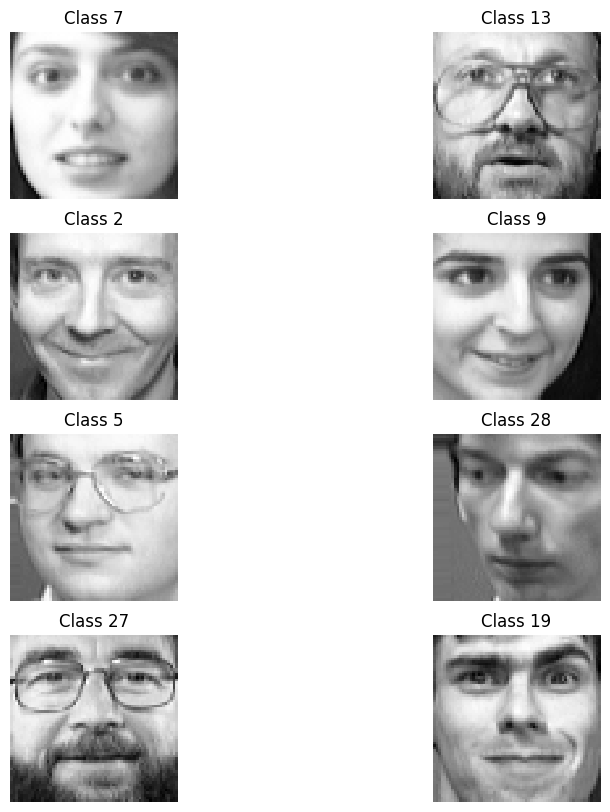

In [45]:
#DISCRETIZA LA BASE DE DATOS SIN MODIFICAR LA VARIABLE CLASE (TANTO EN TRAIN COMO EN TEST)
from sklearn.preprocessing import KBinsDiscretizer
########AÑADE AQUÍ TU CÓDIGO########

n_bins = 5

# Crea un objeto KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')

# Discretiza las características de entrenamiento
X_train_discretized = discretizer.fit_transform(X_train)

# Discretiza las características de prueba
X_test_discretized = discretizer.transform(X_test)


fig = plt.figure(figsize=(10, 10))
for i in range(8):
  fig.add_subplot(4, 2, i+1)
  plt.imshow(X_train[5*i].reshape(64, 64), cmap = mpl.cm.gray, interpolation="nearest")
  plt.title("Class "+str(y_train[5*i]))
  plt.axis("off")

A continuación utilizaremos nuestro **K-NN** con las distancias de Hamming y Jaccard-Needham para clasificar las instancias de test usando la base de datos discretizada. Nos fijaremos únicamente en el vecino más cercano.

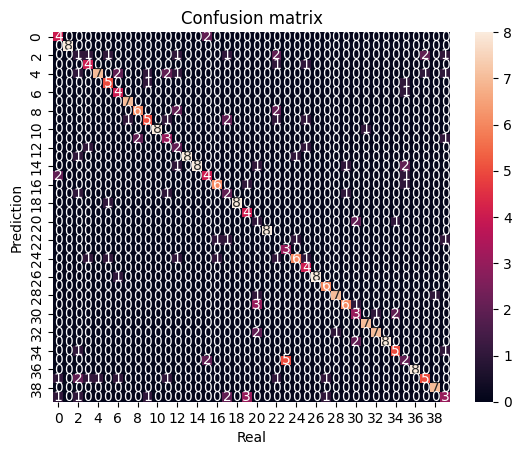

Hamming test accuracy: 0.65


In [50]:
pred = k_nearest_neighbors(X_train,X_test,y_train,k=1,selection=majority,distance=hamming)

confusion_matrix(pred,y_test,n_classes)
print("Hamming test accuracy:",str(accuracy(pred,y_test)))

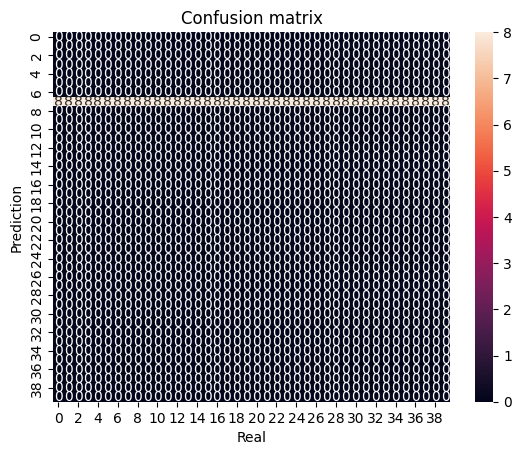

Jaccard test accuracy: 0.025


In [49]:
pred = k_nearest_neighbors(X_train,X_test,y_train,k=1,selection=majority,distance=jaccard)

confusion_matrix(pred,y_test,n_classes)
print("Jaccard test accuracy:",str(accuracy(pred,y_test)))

Como se puede observar, obtenemos resultados bastante buenos incluso con la pérdida de información derivada de la discretización. En caso de haber realizado todo correctamente, se deberían obtener valores de accuracy de alrededor de 0.86 en el caso de la distancia de Hamming y de alrededor de 0.84 en el caso de la distancia de Jaccard-Needham.

# EXTRA-2. Información Mutua

Una de las métricas más utilizadas para medir la correlación entre variables categóricas es la **información mutua**. La información mutua nos indica la *cantidad de información* sobre una variable que nos proporciona el conocer el valor de otra variable. Este tipo de medidas son muy útiles para conocer qué variables predictoras nos dan más información sobre la variable clase a predecir.

Lo primero que vamos a hacer en este ejercicio es crear una función que nos permita calcular la información mutua $I(X;Y)$ entre dos variables categóricas $X$ e $Y$. Para ello, será necesario buscar y entender la fórmula de esta popular métrica de correlación.

In [53]:
#CALCULA LA ENTROPIA DE SHANNON EN FUNCIÓN DE LAS PROBABILIDADES DE ENTRADA
def shannon_entropy(P_x):

  ########AÑADE AQUÍ TU CÓDIGO########

  #...

  entropy = -np.sum(P_x * np.log2(P_x + 1e-10))
  return entropy

#CALCULA LA INFORMACIÓN MUTUA ENTRE LAS VARIABLES CATEGÓRICAS X E Y
def mutual_information(X,Y):
  length = len(X)

  ########AÑADE AQUÍ TU CÓDIGO########

  #PISTA: Dederás calcular las probabilidades necesarias para el cálculo de las
  #entropias H(X), H(Y) y H(X,Y).
  #...

    # Calcula las probabilidades P(X), P(Y), y P(X, Y)
  P_x = np.array([np.sum(X == x) / length for x in set(X)])
  P_y = np.array([np.sum(Y == y) / length for y in set(Y)])

  P_xy = np.zeros((len(set(X)), len(set(Y))))
  for i, x in enumerate(set(X)):
    for j, y in enumerate(set(Y)):
      P_xy[i, j] = np.sum((X == x) & (Y == y)) / length

    # Calcula las entropías
  H_x = shannon_entropy(P_x)
  H_y = shannon_entropy(P_y)
  H_xy = shannon_entropy(P_xy.flatten())

    # Calcula la información mutua
  mutual_information = H_x + H_y - H_xy
  return mutual_information

Como hemos mencionado anteriormente, la información mutua puede ser muy útil para descubrir cuales son las variables predictoras más relevantes en una base de datos. Esta información puede ser crucial a la hora de calcular las distancias entre muestras en el **K-NN**, ya que nos permite dar más relevancia a aquellas variables con una gran relación con el valor de clase, e ignorar aquellas que solo añadan ruido al proceso de predicción.

Por este motivo, el último paso a realizar será añadir una nueva métrica de distancia para variables categóricas llamada *weighted_hamming*, la cuál será una versión modificada de la **distancia de Hamming**. La principal particularidad de esta métrica es que incluirá un *pesado de variables predictoras*. En nuestro caso, dicho pesado será proporcional a la **información mutua** con respecto a la variable clase. Es decir, el peso de cada variable $X_i$ se calculará de la siguiente forma:

\begin{equation}
w_i = \frac{I(X_i;Y)}{\sum_{j=1}^n I(X_j;Y)}
\end{equation}

donde $\{X_1,X_2,...,X_n\}$ es el conjunto de todas las variables predictoras e $Y$ es la variable clase. Los pesos a utilizar en la métrica de distancia se especificarán mediante un nuevo argumento *weights* en la función *k_nearest_neighbors*.

In [54]:
#CALCULA LA DISTANCIA DE HAMMING ENTRE LOS VECTORES BINARIOS A Y B PONDERADA EN BASE A LOS PESOS EN W
def weighted_hamming(A,B,W):

  ########AÑADE AQUÍ TU CÓDIGO########

  #...

  weighted_dist = np.sum(W * (A != B))
  return weighted_dist



###DEVUELVE LA CLASE Y DISTANCIA DE LOS K VECINOS MÁS CERCANOS
def get_neighbors(test_row,X_train,y_train,k,distance,weights):

  ########AÑADE AQUÍ TU CÓDIGO########

  #PISTA: Copia y modifica la función del ejercicio 3 de forma que acepte métricas
  #de distancia con pesado de variables.
  #...

  if weights is not None:
        distances = np.array([distance(test_row, x, weights) for x in X_train])
  else:
    distances = np.array([distance(test_row, x) for x in X_train])

    # Encuentra los índices de los k vecinos más cercanos
  indices = np.argsort(distances)[:k]

    # Obtiene las clases y distancias de los k vecinos más cercanos
  neighbors_classes = y_train[indices]
  neighbors_dists = distances[indices]

  return neighbors_classes, neighbors_dists

#CLASIFICADOR K-NN
def k_nearest_neighbors(X_train,X_test,y_train,k,selection,distance,weights=None):
  predictions = np.empty(len(X_test),dtype=y_train.dtype)
  for test_ind in range(len(X_test)):
    ###ENCUENTRA LOS K VECINOS MÁS CERCANOS
    test_row = X_test[test_ind]
    neighbors_classes, neighbors_dists = get_neighbors(test_row,X_train,y_train,k,distance,weights)
    ###CALCULA LA CLASE SEGÚN LOS K VECINOS MÁS CERCANOS
    predictions[test_ind] = selection(neighbors_classes,neighbors_dists)
  return predictions

Finalmente, vamos a probar la nueva métrica de distancia con pesado de variables utilizando nuestra base de datos discretizada. Es importante tener en cuenta que el peso de las variables se debe calcular tomando en cuenta **SOLO** las instancias de entrenamiento, ya que de lo contrario sufriríamos de *data leaking*. Al igual que en el anterior ejercicio, nos fijaremos solo en el vecino más cercano para clasificar las instancias de test.

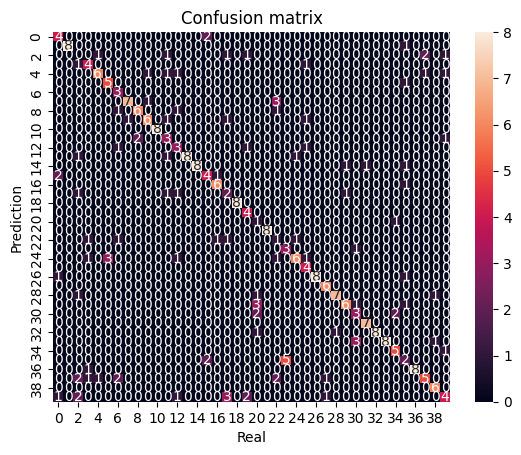

Test accuracy: 0.653125


In [56]:
#CALCULA EL PESADO DE VARIABLES EN BASE A LA INFORMACIÓN MUTUA
from sklearn.feature_selection import mutual_info_classif
weights = np.zeros(len(X_train[0]))

########AÑADE AQUÍ TU CÓDIGO########

#PISTA: La posición i del array weights debe contener el peso de la i-ésima
#variable. Los pesos se calculan en base a la información mutua con respecto
#al valor de clase.
mutual_info = mutual_info_classif(X_train, y_train)

# Normaliza la información mutua para obtener pesos en el rango [0, 1]
weights = mutual_info / np.max(mutual_info)

pred = k_nearest_neighbors(X_train,X_test,y_train,k=1,selection=majority,distance=weighted_hamming,weights=weights)

confusion_matrix(pred,y_test,n_classes)
print("Test accuracy:",str(accuracy(pred,y_test)))

Como se puede observar, obtenemos resultados de accuracy ligeramente superiores a los obtenidos por la distancia de Hamming sin pesado de variables.

Por curiosidad, antes de finalizar vamos a representar en forma de imagen en blanco y negro los pesos utilizados para las variables predictoras en el modelo anterior. Dado que cada variable en nuestra base de datos representa un píxel de una imagen, esta visualización nos dará una idea sobre qué partes de las imágenes son más relevantes a la hora de clasificar los rostros del **Olivetti Faces data-set**. Teniendo esto en cuenta, el color blanco representa píxeles con una información mutua más alta con respecto a la variable clase, mientras que lo contrario ocurre con el color negro.

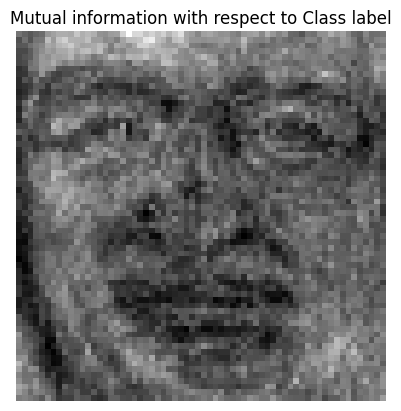

In [57]:
plt.imshow(weights.reshape(64, 64), cmap = mpl.cm.gray, interpolation="nearest")
plt.title("Mutual information with respect to Class label")
plt.axis("off")
plt.show()